In [1]:
import csv
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams["figure.dpi"] = 300

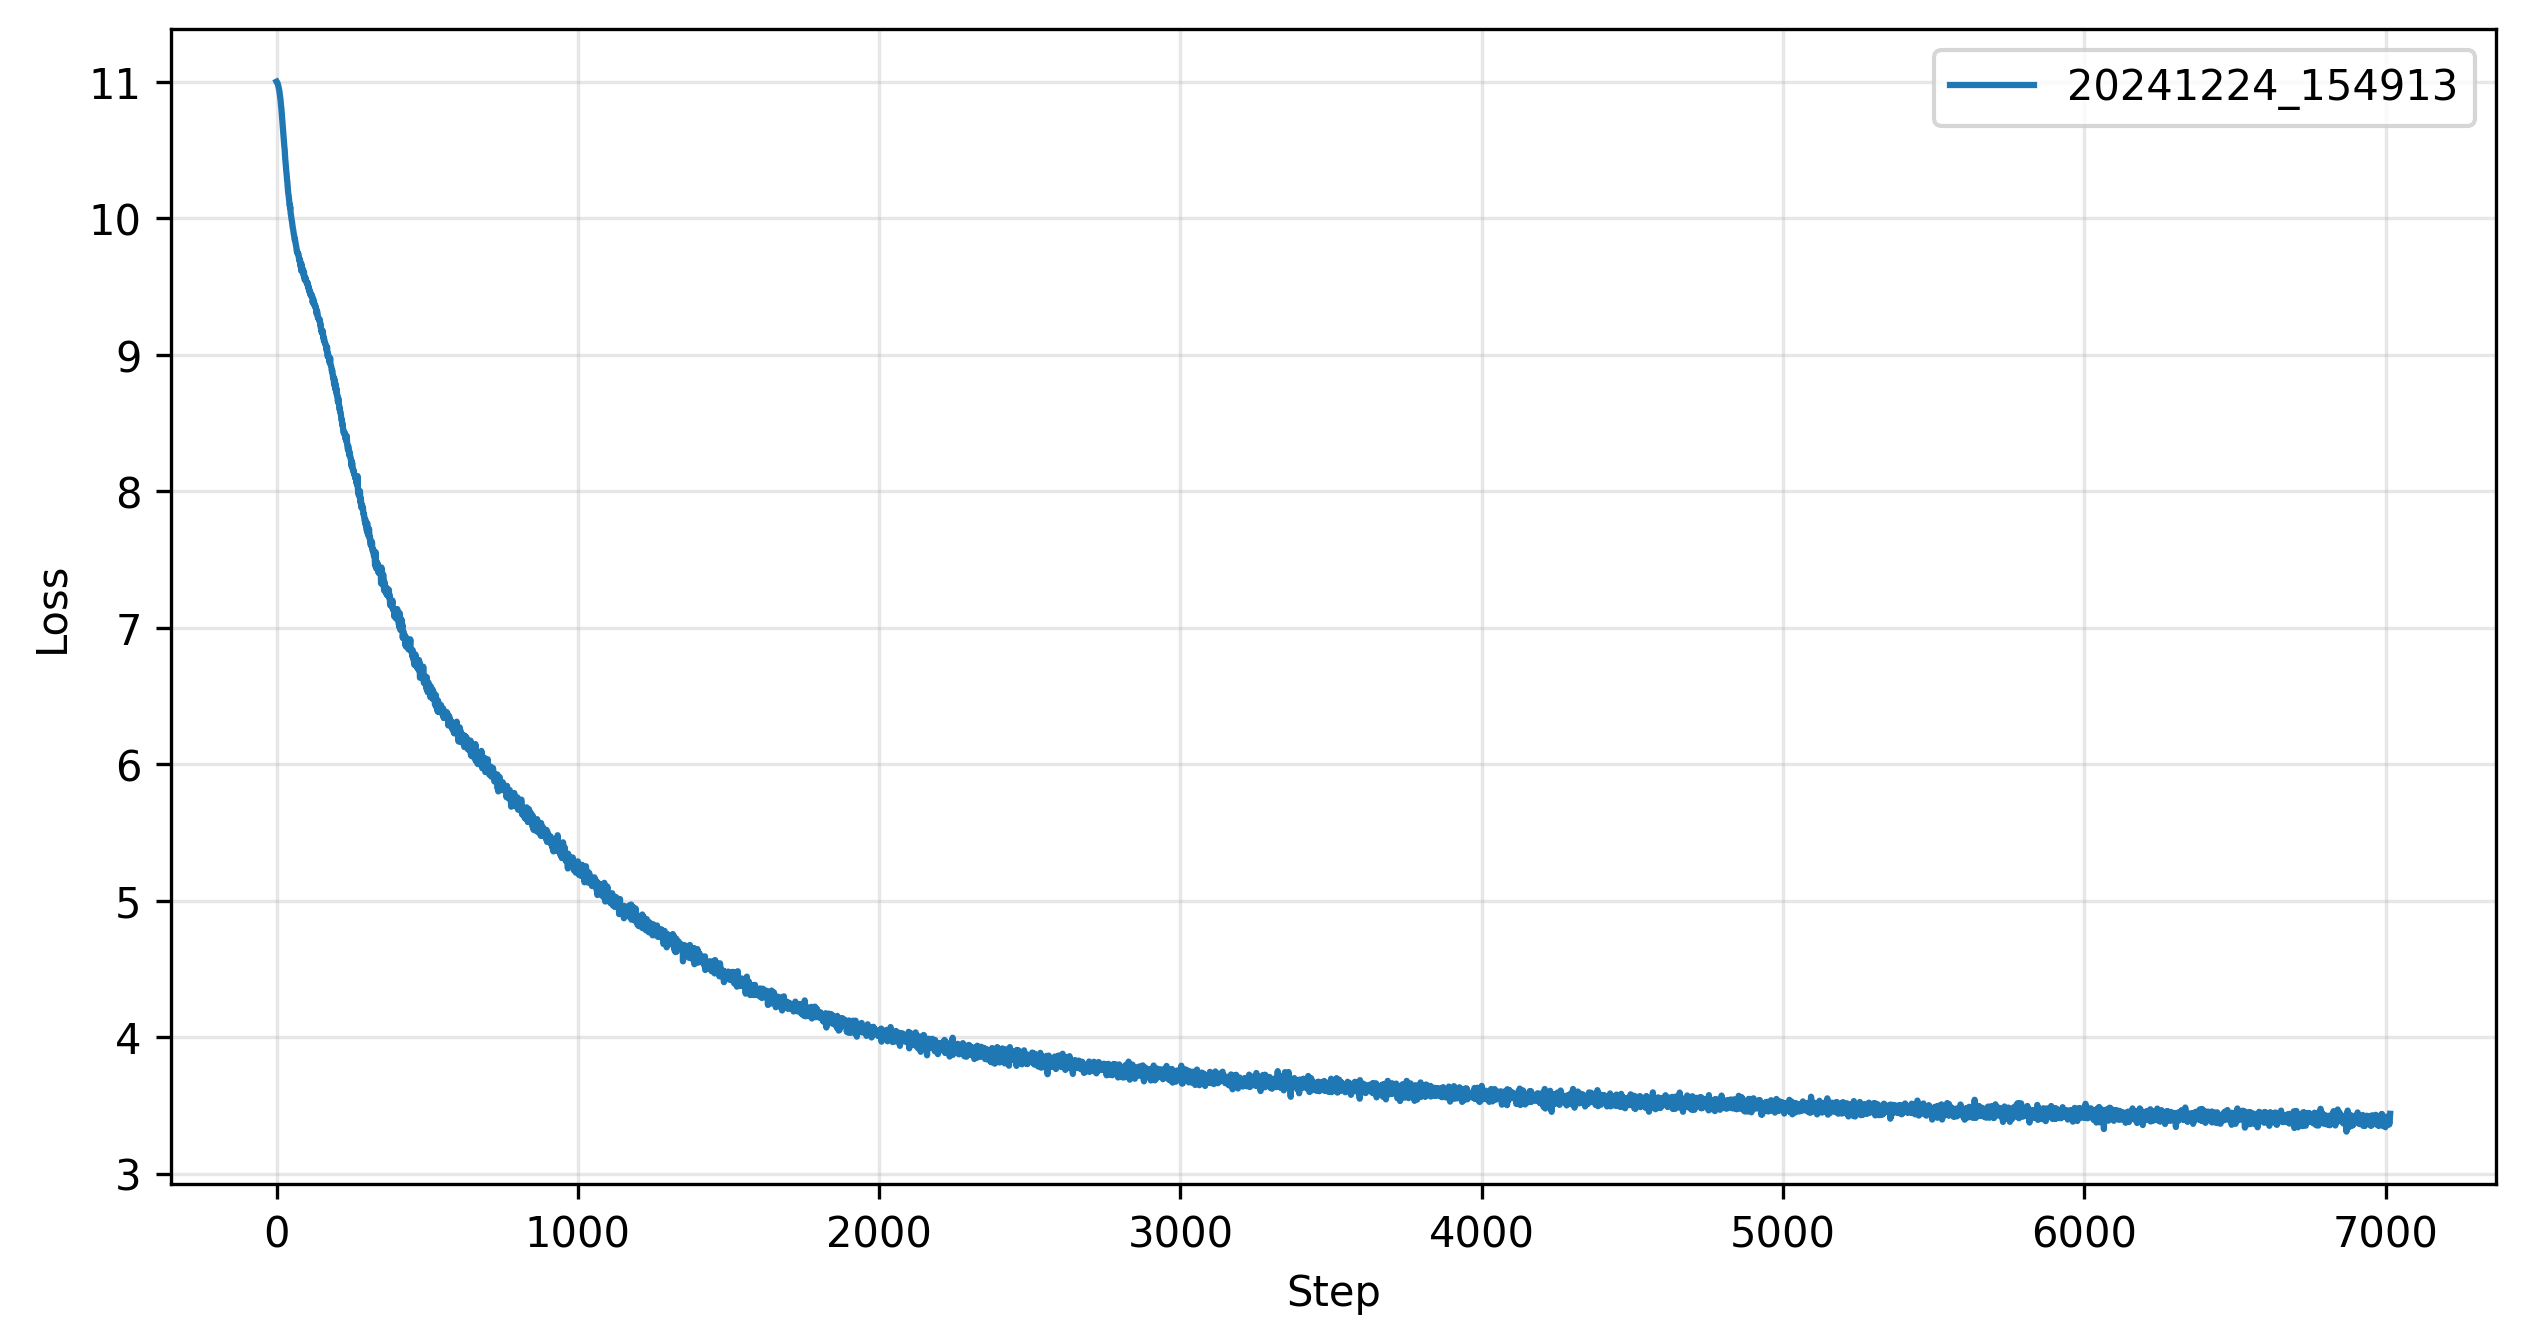

In [2]:
max_steps = 10000


def get_steps_losses(date: str) -> tuple[list[int], list[float]]:
    steps = []
    losses = []

    train_loss_path = Path(f"../checkpoints/{date}/train_loss.csv")

    with train_loss_path.open("r") as file:
        csvreader = csv.reader(file)
        for row in csvreader:
            steps.append(int(row[0]))
            losses.append(float(row[1]))

    return steps[:max_steps], losses[:max_steps]


date_1 = "20241224_154913"

steps_1, losses_1 = get_steps_losses(date_1)

plt.figure(figsize=(10, 5))
plt.plot(steps_1, losses_1, label=date_1)
plt.xlabel("Step")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

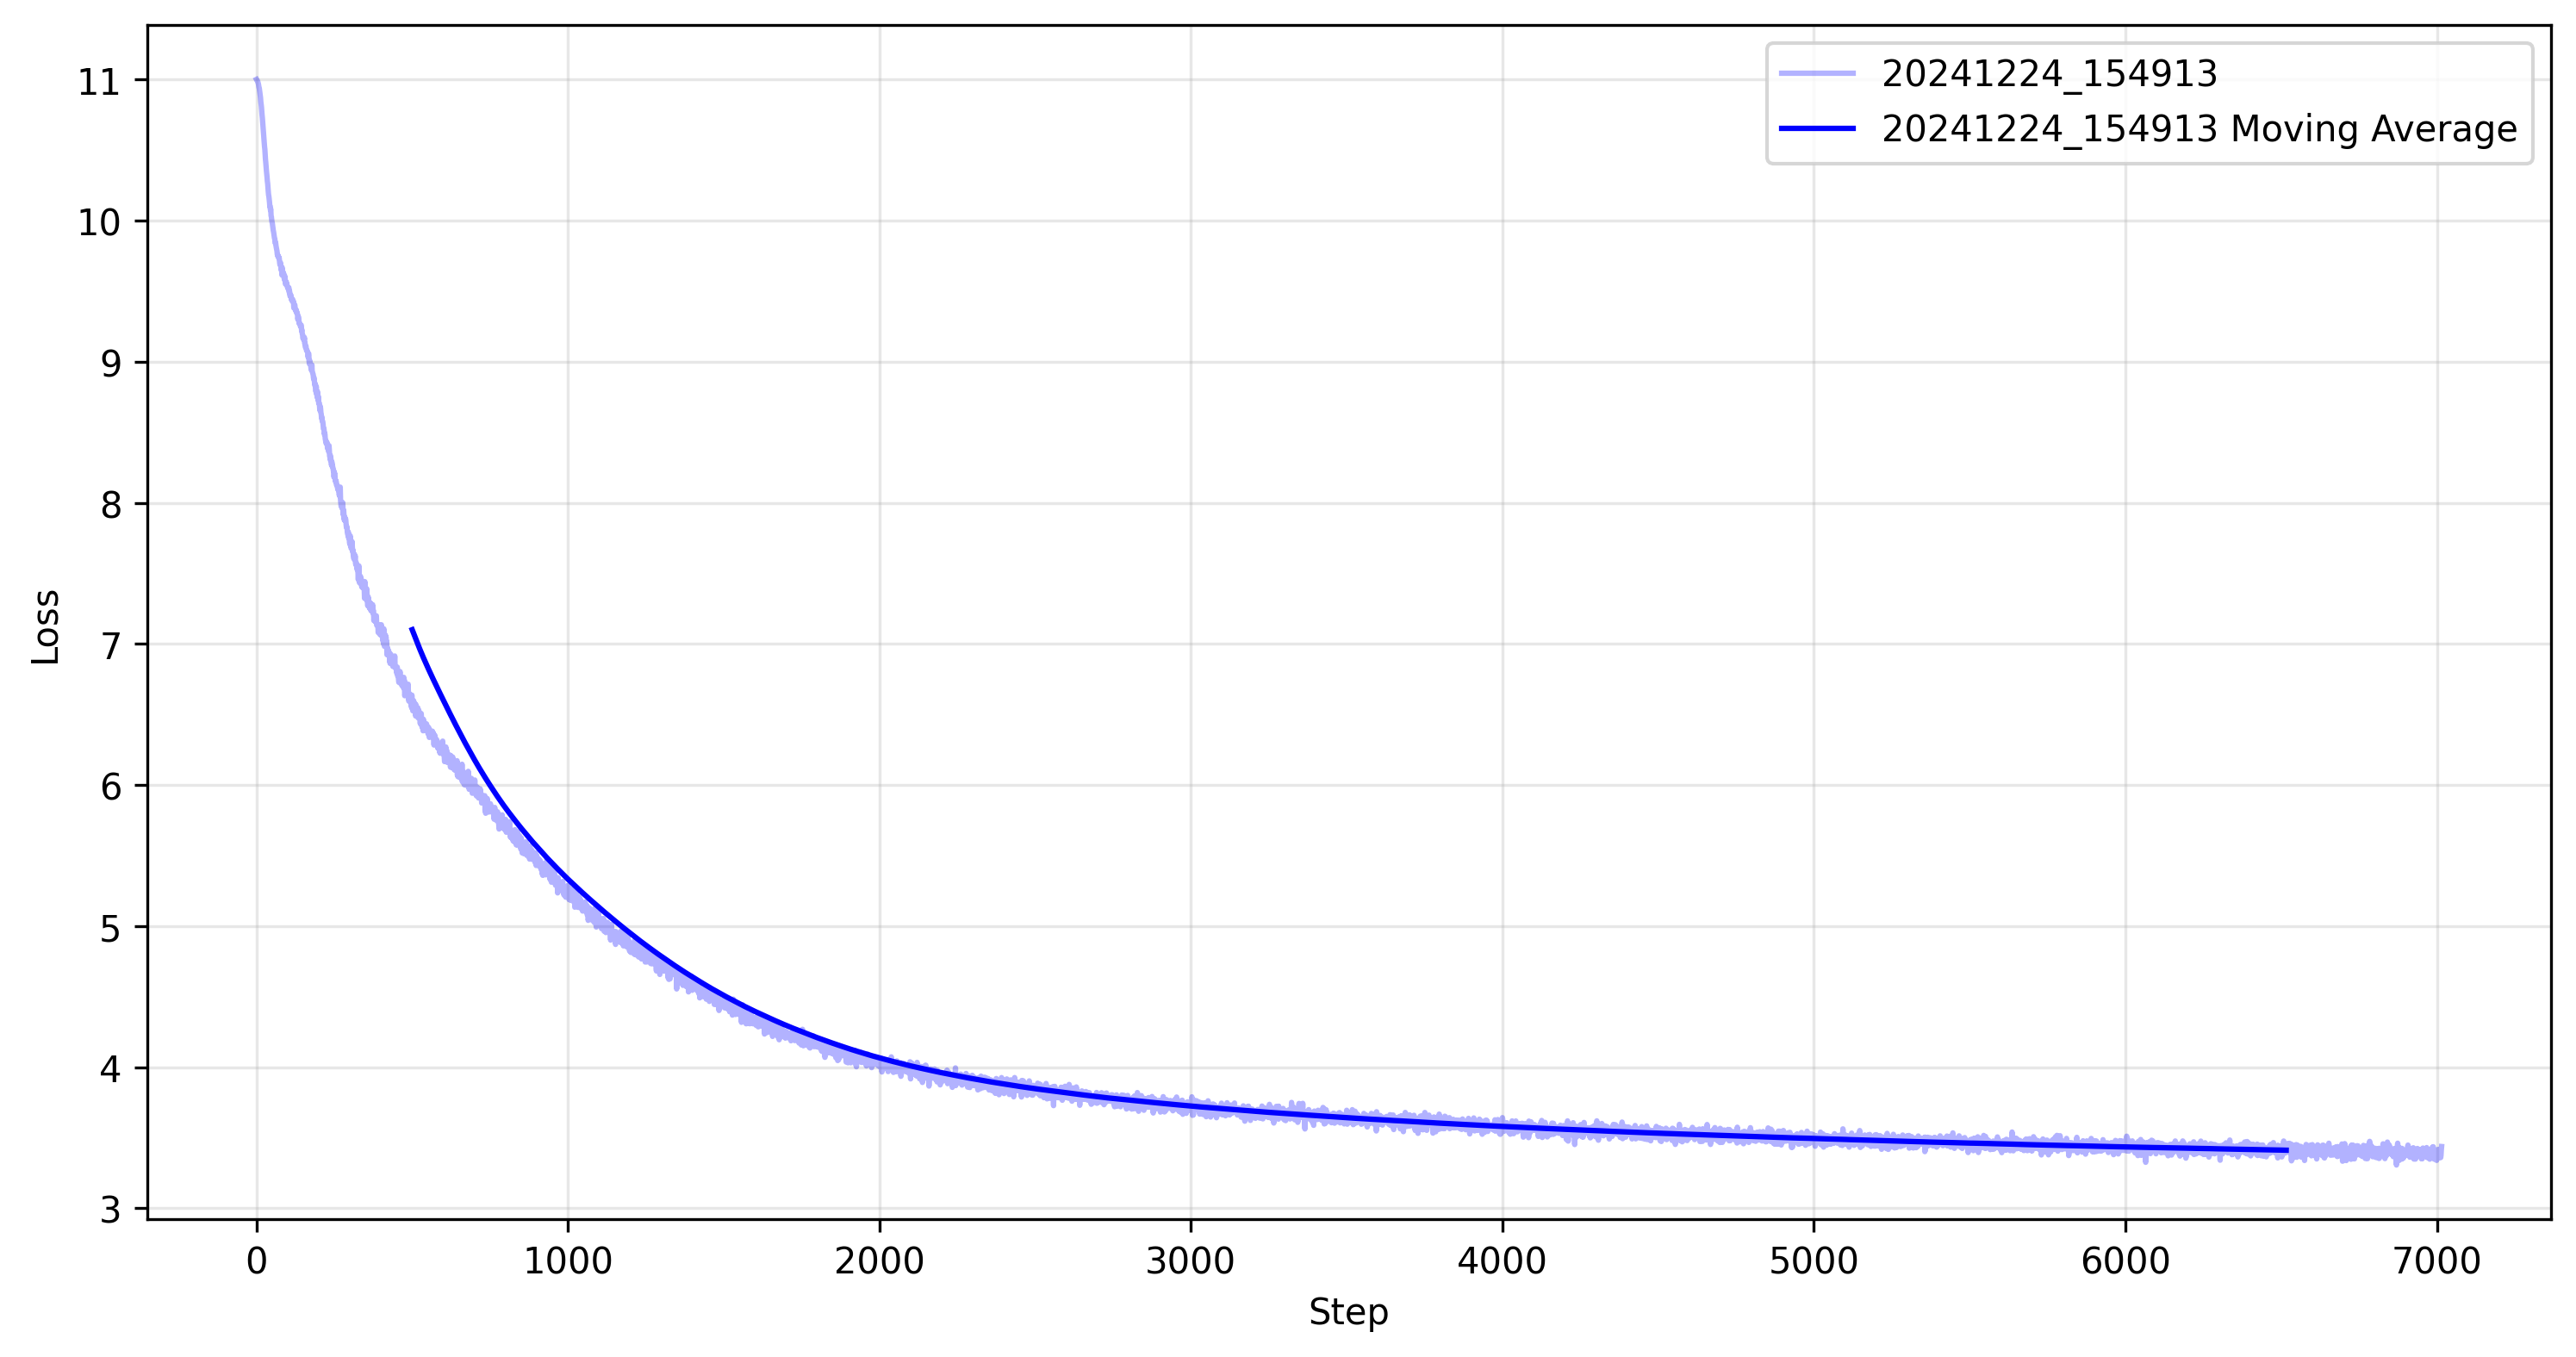

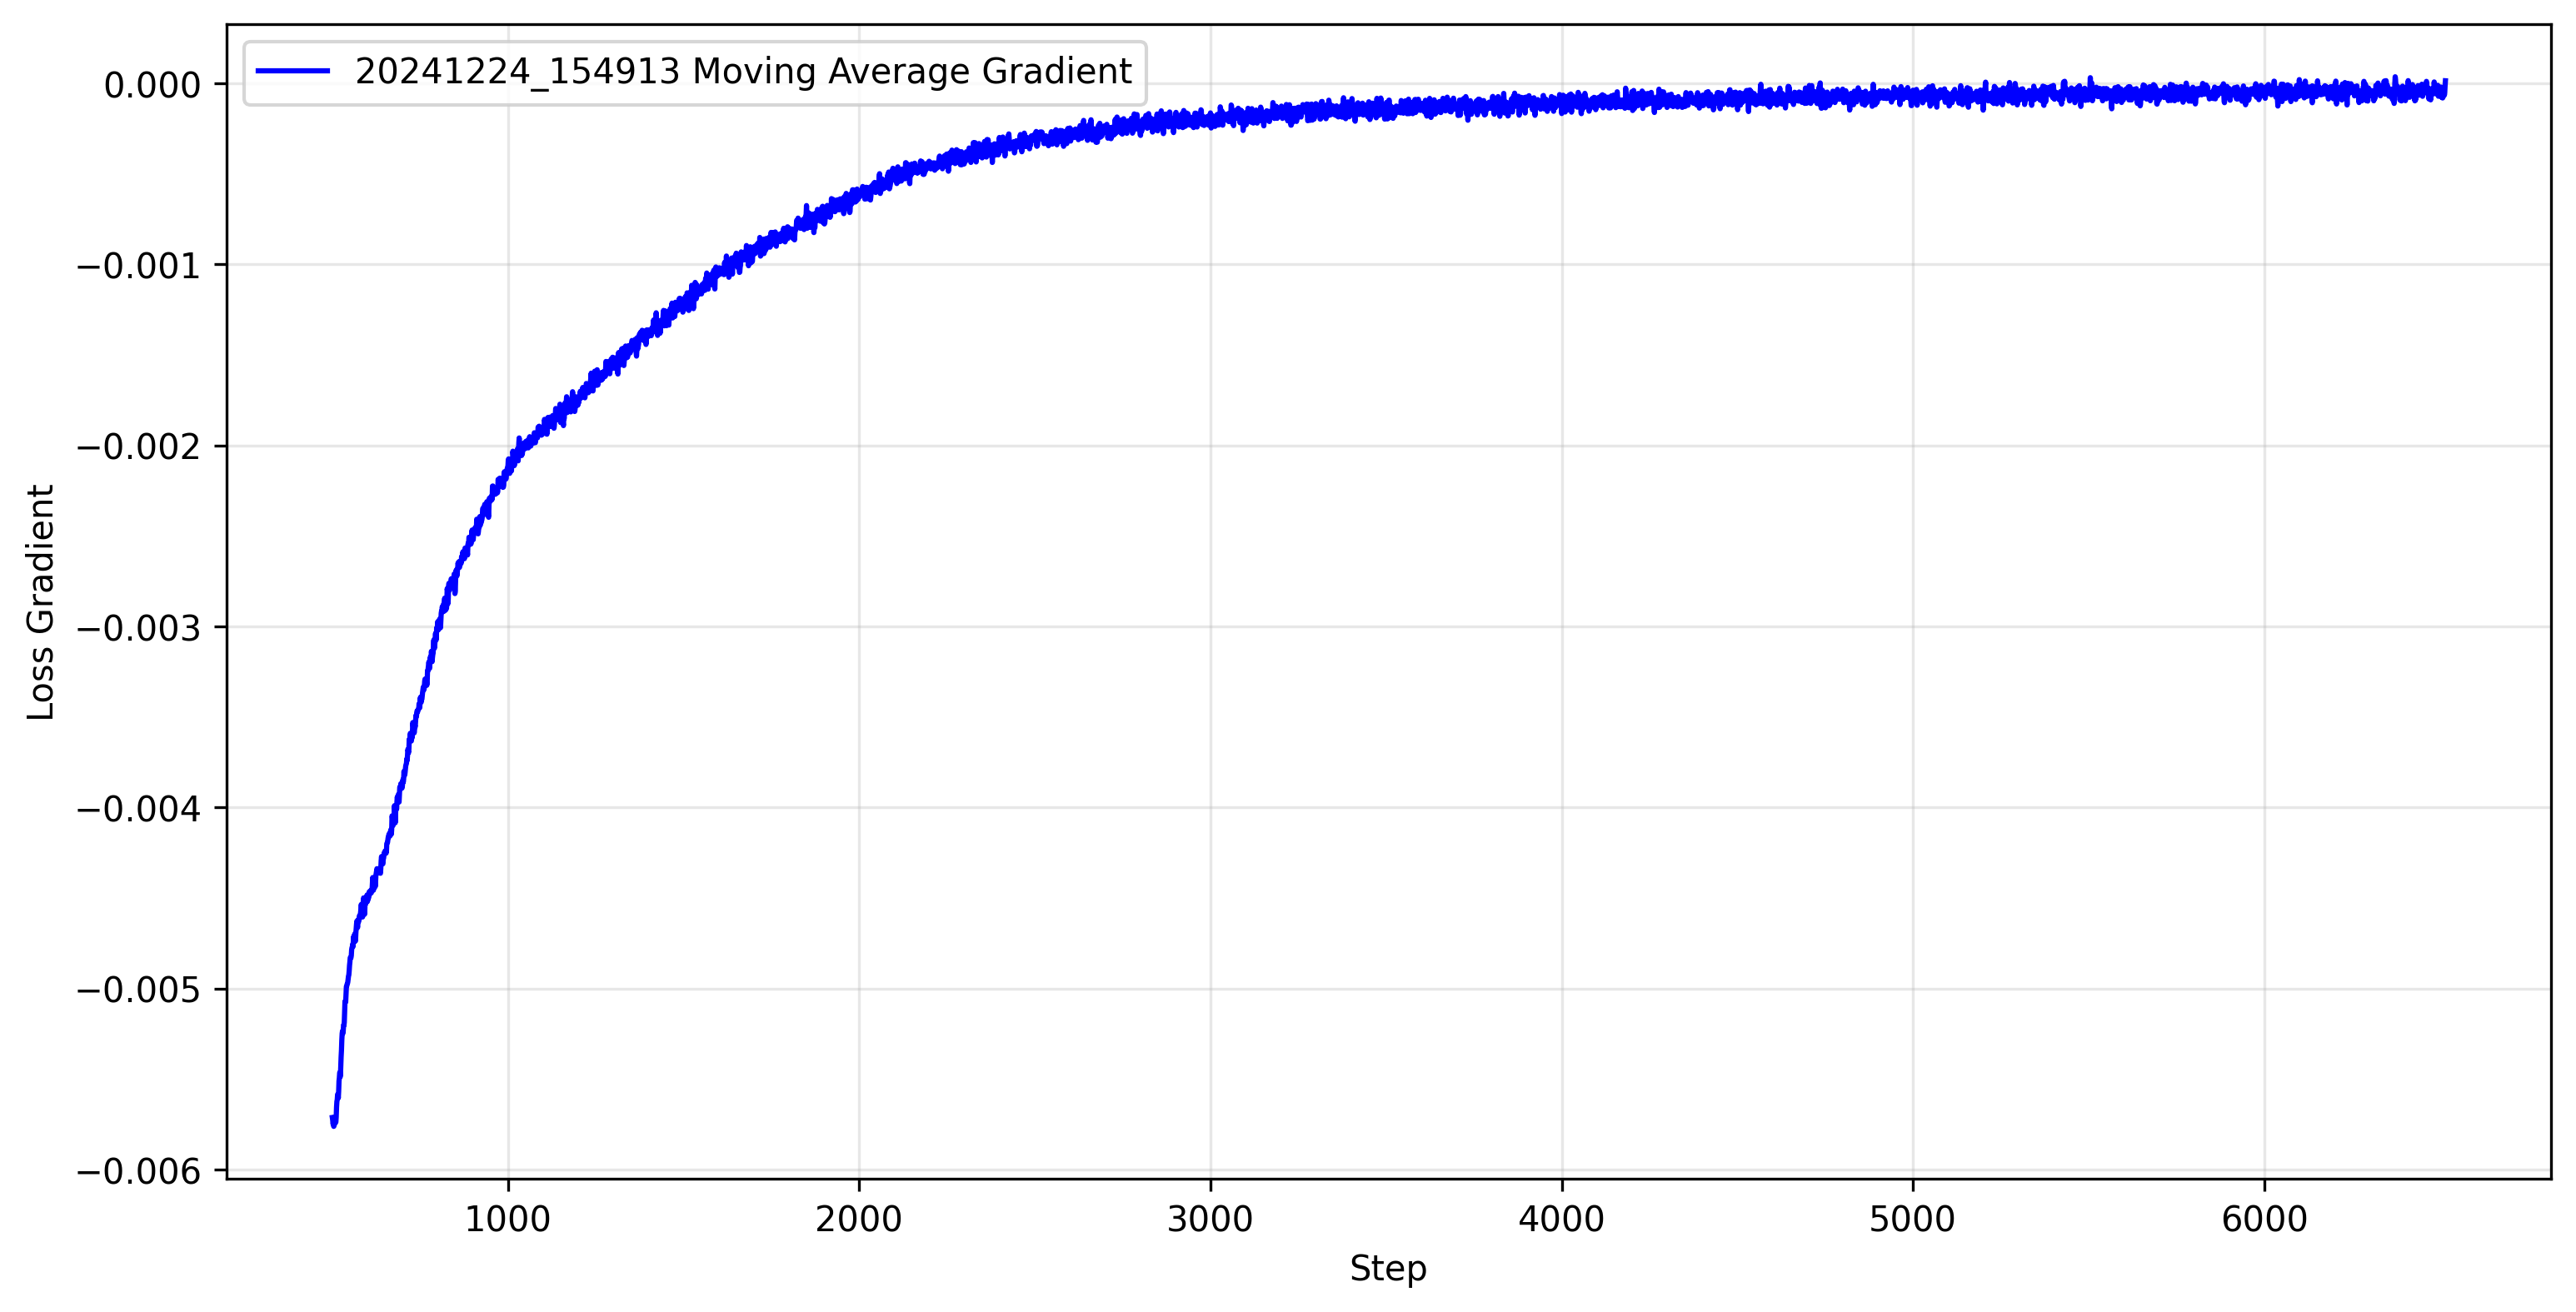

In [3]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), "valid") / w


window_size = 1000
steps_1_ma = steps_1[window_size // 2 : -window_size // 2 + 1]
ma = moving_average(losses_1, window_size)

plt.figure(figsize=(12, 6))
plt.plot(steps_1, losses_1, color="blue", alpha=0.3, label=date_1)


plt.plot(steps_1_ma, ma, color="blue", label=f"{date_1} Moving Average")

plt.xlabel("Step")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

ma_gradient = np.gradient(ma)

plt.figure(figsize=(12, 6))
plt.plot(steps_1_ma, ma_gradient, color="blue", label=f"{date_1} Moving Average Gradient")
plt.xlabel("Step")
plt.ylabel("Loss Gradient")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()